# Implementation of Apriori algorithm

## Import Libraries

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## Importing and One-Hot Encoding data

In [18]:
# Reimport basket values dataset
basket_data = pd.read_csv("../dataset/basket_data.csv")

# OPTIONAL: Drop the index column if it exists (e.g., 'Unnamed: 0')
if 'Unnamed: 0' in basket_data.columns:
    basket_data = basket_data.drop(columns=['Unnamed: 0'])

# Convert to List of Lists
transactions = basket_data.astype(str).values.tolist()

# Instantiate and fit the encoder
encoder = TransactionEncoder()
onehot_matrix = encoder.fit(transactions).transform(transactions)

# Convert back to DataFrame (The "Apriori Ready" format)
df_encoded = pd.DataFrame(onehot_matrix, columns=encoder.columns_)

# Check the shape: (Number of Earthquakes, Number of Unique Items)
print(f"Matrix Shape: {df_encoded.shape}")
print(df_encoded.head())

Matrix Shape: (110331, 36)
    ABRA  AGUSAN DEL SUR  BATANGAS  CAGAYAN   CEBU  COTABATO  DAVAO DEL SUR  \
0  False           False     False    False  False     False          False   
1  False           False     False    False  False     False          False   
2  False           False     False    False  False     False          False   
3  False           False     False    False   True     False          False   
4  False           False     False    False  False     False          False   

   DAVAO OCCIDENTAL  DAVAO ORIENTAL  Depth_Crust  ...  OCCIDENTAL MINDORO  \
0             False            True         True  ...               False   
1             False           False        False  ...               False   
2             False            True         True  ...               False   
3             False           False         True  ...               False   
4             False           False        False  ...                True   

   SOUTHERN LEYTE  SURIGAO DEL NORT

## Implementing Apriori and Generating Rules (Sorted by highest lifts/strong association)

In [19]:
# Mine Frequent Itemsets
# min_support=0.01 means the pattern must appear in at least 1% of the data
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)

# Sort by Lift (Strength of Association)
rules = rules.sort_values('lift', ascending=False)

# Display the Top 10 Rules
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


# Convert frozensets to strings 
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Export to CSV
final_cols = ['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']
# Create the clean dataframe
apriori_rules = rules[final_cols]
apriori_rules.to_csv("apriori_association_rules.csv", index=False)
print(f"Successfully generated {len(apriori_rules)} rules. Saved to 'apriori_association_rules.csv'.")

# Display Stats
print(f"\nHighest Lift: {apriori_rules['lift'].max()}")
print(f"Lowest Lift: {apriori_rules['lift'].min()}")


Association Rules:
                          antecedents                       consequents  \
46    (Magnitude_Minor, Depth_Crust)                (DAVAO OCCIDENTAL)   
49                (DAVAO OCCIDENTAL)    (Magnitude_Minor, Depth_Crust)   
16                 (Magnitude_Minor)                (DAVAO OCCIDENTAL)   
17                (DAVAO OCCIDENTAL)                 (Magnitude_Minor)   
48                 (Magnitude_Minor)   (DAVAO OCCIDENTAL, Depth_Crust)   
47   (DAVAO OCCIDENTAL, Depth_Crust)                 (Magnitude_Minor)   
37  (Depth_Surface, Magnitude_Micro)                            (CEBU)   
38                            (CEBU)  (Depth_Surface, Magnitude_Micro)   
18                 (Magnitude_Minor)                  (DAVAO ORIENTAL)   
19                  (DAVAO ORIENTAL)                 (Magnitude_Minor)   

     support  confidence      lift  
46  0.012553    0.174302  2.661711  
49  0.012553    0.191696  2.661711  
16  0.026928    0.171983  2.626300  
17  0.026928    

## Sort by Highest Confidence

In [20]:
# Sort by Confidence
rules = rules.sort_values('confidence', ascending=False)

# Display the Top 10 Rules
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Association Rules:
                        antecedents      consequents   support  confidence  \
34               Depth_Crust, CEBU  Magnitude_Micro  0.014964    0.980404   
26           BATANGAS, Depth_Crust  Magnitude_Micro  0.021046    0.919968   
32            Time_Night, BATANGAS  Magnitude_Micro  0.015879    0.918721   
30          Time_Evening, BATANGAS  Magnitude_Micro  0.012698    0.915088   
6                         BATANGAS  Magnitude_Micro  0.046868    0.913604   
5                   AGUSAN DEL SUR  Magnitude_Micro  0.013079    0.910410   
13                            CEBU  Magnitude_Micro  0.034677    0.907065   
28         Depth_Surface, BATANGAS  Magnitude_Micro  0.016369    0.904357   
2                             ABRA  Magnitude_Micro  0.023185    0.898805   
64  Time_Night, OCCIDENTAL MINDORO  Magnitude_Micro  0.014946    0.896683   

        lift  
34  1.210025  
26  1.135434  
32  1.133894  
30  1.129411  
6   1.127580  
5   1.123638  
13  1.119509  
28  1.11616

## Sort by Highest Support

In [ ]:
# Sort by Support 
rules = rules.sort_values('support', ascending=False)

# Display the Top 10 Rules
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Association Rules:
                      antecedents                   consequents   support  \
63                     LOC_OTHER   Time_Night, Magnitude_Micro  0.081274   
62   Time_Night, Magnitude_Micro                     LOC_OTHER  0.081274   
7                Magnitude_Micro                      BATANGAS  0.046868   
6                       BATANGAS               Magnitude_Micro  0.046868   
12               Magnitude_Micro                          CEBU  0.034677   
13                          CEBU               Magnitude_Micro  0.034677   
50  Depth_Crust, Magnitude_Micro             SURIGAO DEL NORTE  0.031251   
51             SURIGAO DEL NORTE  Depth_Crust, Magnitude_Micro  0.031251   
79      Depth_Surface, LOC_OTHER   Time_Night, Magnitude_Micro  0.030327   
78   Time_Night, Magnitude_Micro      Depth_Surface, LOC_OTHER  0.030327   

    confidence      lift  
63    0.320811  1.103109  
62    0.279459  1.103109  
7     0.057845  1.127580  
6     0.913604  1.127580  
12    0


Association Rules:
                      antecedents                   consequents   support  \
63                     LOC_OTHER   Time_Night, Magnitude_Micro  0.081274   
62   Time_Night, Magnitude_Micro                     LOC_OTHER  0.081274   
7                Magnitude_Micro                      BATANGAS  0.046868   
6                       BATANGAS               Magnitude_Micro  0.046868   
12               Magnitude_Micro                          CEBU  0.034677   
13                          CEBU               Magnitude_Micro  0.034677   
50  Depth_Crust, Magnitude_Micro             SURIGAO DEL NORTE  0.031251   
51             SURIGAO DEL NORTE  Depth_Crust, Magnitude_Micro  0.031251   
79      Depth_Surface, LOC_OTHER   Time_Night, Magnitude_Micro  0.030327   
78   Time_Night, Magnitude_Micro      Depth_Surface, LOC_OTHER  0.030327   

    confidence      lift  
63    0.320811  1.103109  
62    0.279459  1.103109  
7     0.057845  1.127580  
6     0.913604  1.127580  
12    0

## Visualizing generated rules

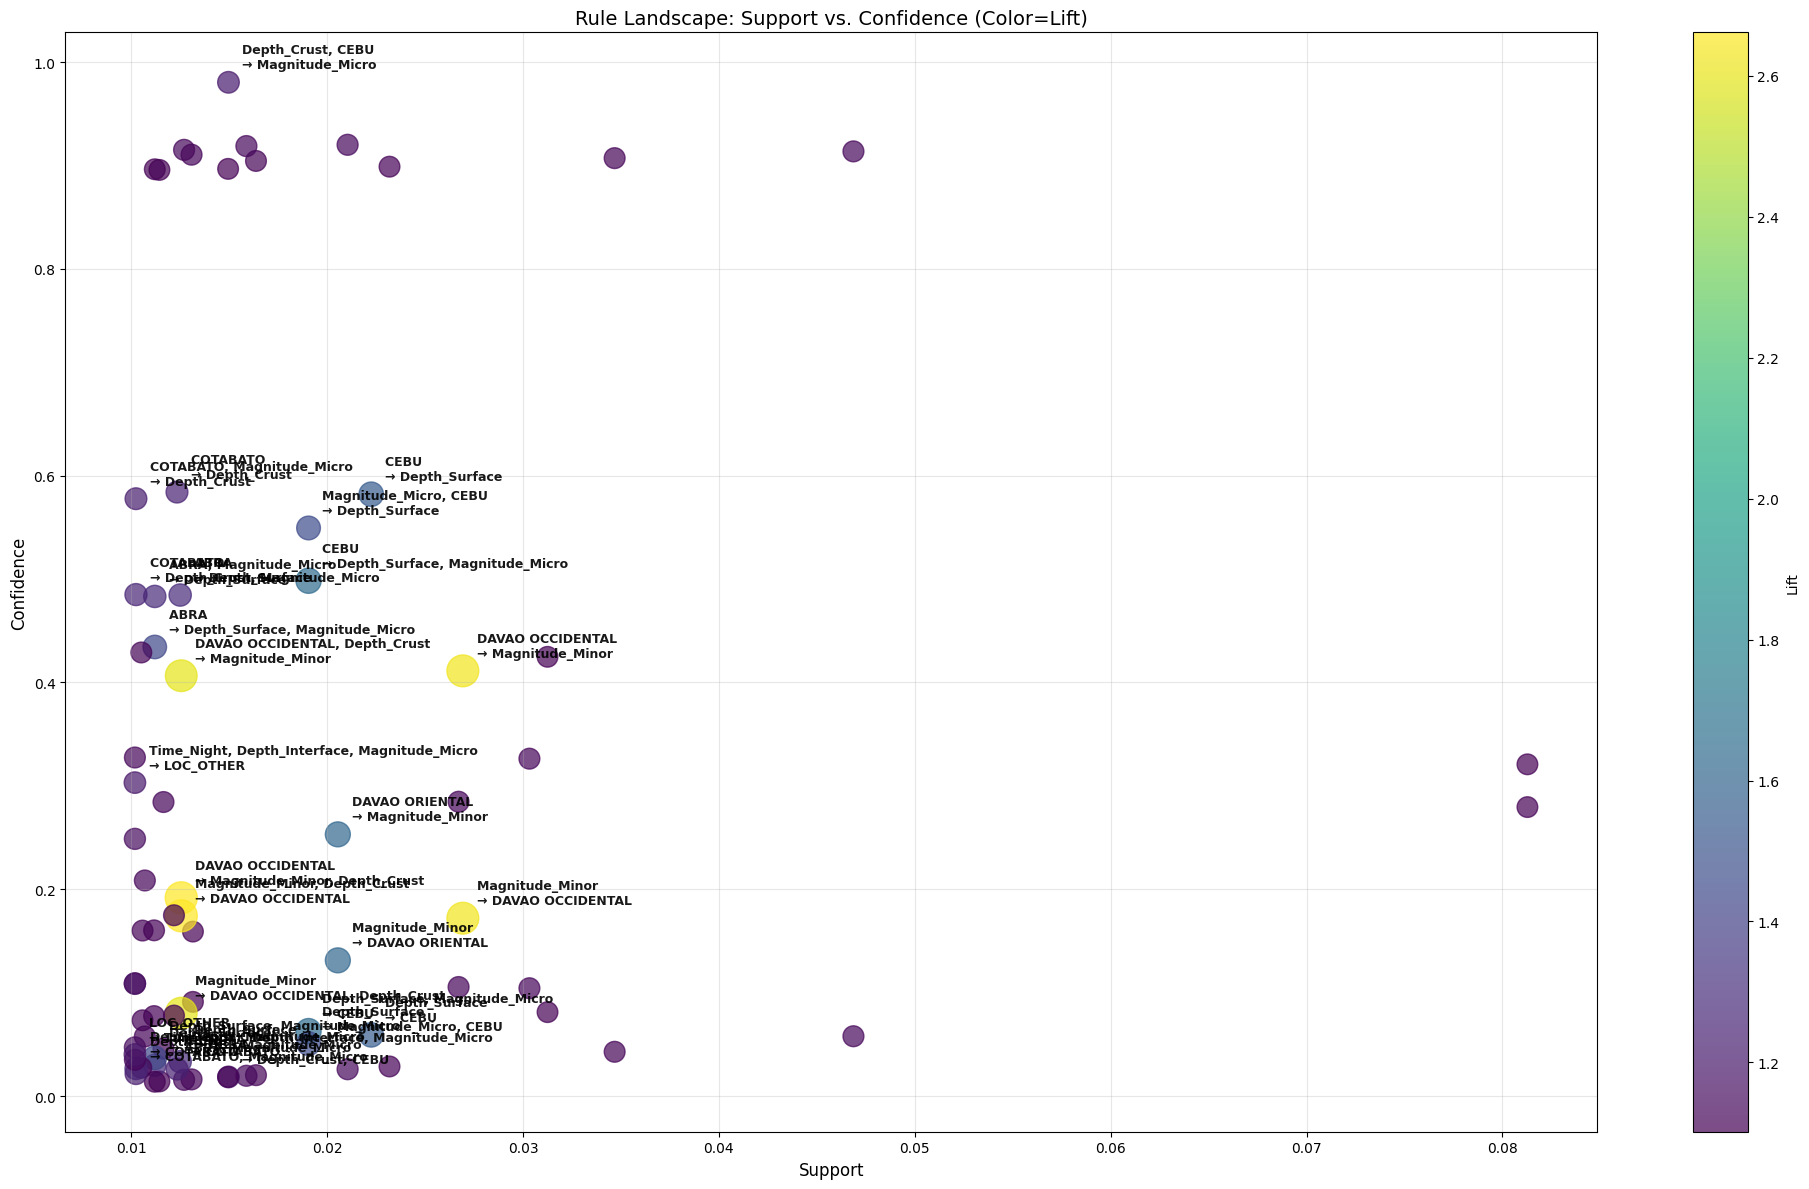

In [ ]:
# Set the figure size (width=20 inches, height=12 inches)
fig, ax = plt.subplots(figsize=(20, 12))

scatter = ax.scatter(
    x=rules["support"],
    y=rules["confidence"],
    c=rules["lift"],
    cmap="viridis",
    s=rules["lift"] * 200,  # Increased multiplier for bigger dots
    alpha=0.7
)


# Get top 30 rules by lift for labeling
top_30_rules = rules.nlargest(30, 'lift')

for idx, row in top_30_rules.iterrows():
    ax.annotate(
        f"{row['antecedents']} \n→ {row['consequents']}", 
        xy=(row['support'], row['confidence']),
        xytext=(10, 10),
        textcoords='offset points',
        fontsize=9,
        color='black',
        fontweight='bold',
        alpha=0.9
    )

ax.set_xlabel('Support', fontsize=12)
ax.set_ylabel('Confidence', fontsize=12)
ax.set_title("Rule Landscape: Support vs. Confidence (Color=Lift)", fontsize=14)
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Lift')

plt.tight_layout()
plt.show()

## Observation from First Apriori Rule Mining Implementation
### In this section we are going to discuss the implications of some of the generated rules of the Apriori algorithm to the Philippine Earthquake Dataset.

* On row 36, the rule {Depth_Surface, Magnitude_Micro} -> {CEBU} has a lift of Lift: 1.64. Cebu is strongly associated with surface-deep and micro magnitude earthquakes. 

* Additonally, a rule with high confidence (98%) associated Cebu with Depth_crust and micro_magnitude. This is followed by the 91% confidence of Batangas and Depth_Crust associated with micro magnitudes.

* Analysis: When compared to provinces like Surigao del Sur and Davao Occidental, Cebu does not sit near a subduction trench (Philippine Trench). The seismic activity in the place is driven by the Cebu Fault System, which runs through the island's crust. For Batangas, it is situated near Lubang Fault, which lies between Mindoro Island and Batangas. Then we have the Batangas Bay Fault System and the Taal Volcano.

* Insight: The Apriori algorithm correctly produced a rule that identified Cebu as a "Crustal Source Zone", described by (<15km) earthquake events. It implies that seismic risk in Cebu is localized to that area and is dominated with very small earthquakes. Strong earthquakes are extremely rare and can be considered as statisical anomalies, evident by recent earthquakes in City of Bogo. We can deduce that Batangas is also dominated by swarms of very small earthquakes--with 91% chance of these earthquakes having magnitude 0 to 3--rather than large earthquakes.


------------------------------------------------------------------------------------------------------------


* The rule {Depth_Crust (15-40km), Magnitude_Minor (Magnitude 3-4)} ->  {DAVAO OCCIDENTAL} has a lift of Lift: 2.6617 (highest lift/association) and confidence of 17%

* Analysis: The subducting Philippine Sea Plate dives beneath Mindanao, creating earthquakes at varying depths (Interface and Deep). The algorithm picks this up as a "mixed" or "deeper" signal compared to Cebu. To add, the algorithm has detected that earthquakes in Davao Occidental tend to occur in the Lower Crust which is 15–40 km deep.

* Insight: The provinces in Eastern Mindanao, Surigao del Sur and Davao Occidental, exhibits a complex 'Trench Signature,' distinguishing it from the purely crustal regime of the Visayas. This is due to its proximity to the Philippine Trench and it lies on the Philippine Fault System. If an earthquake happens in Davao Occidental, it is 2.6x more likely to be a "Minor" earthquake than the national average.


----------------------------------------------------------------------------------------------


* As for the rule: {SURIGAO DEL SUR} → {Mag_Micro} (most active area) has Confidence: 82% (Very High Reliability) with Lift: 1.01 (Near Random/Baseline)

* Analysis: Surigao is not "special"; it is "dominant." Because the 2023 swarm produced so many thousands of earthquakes, Surigao's behavior (Shallow + Micro) effectively defined the national average.

* Insight: The dataset confirms that the 2023-2025 Surigao Del Sur Swarm was characterized by high-frequency, low-magnitude surface energy release. The low Lift (1.01) indicates that this swarm behavior statistically overwhelmed the dataset, becoming the 'standard' profile for Philippine seismicity during this period.


----------------------------------------------------------------------------------------------

* Rule: {DAVAO ORIENTAL} -> {Magnitude_Minor} with Lift: 1.61

* Analysis: Similar to Davao Occidental, Davao Oriental shows a Lift > 1.6 for Minor earthquakes.

* Insight: Both provinces (Occidental and Oriental) share a similarity when it comes to seismic events, they are the only two regions in the top rules that strongly predict Magnitude_Minor events. Thus proving that proximity to the Philippine Trench and on active fault lines creates a distinct, higher-energy earthquake profile compared to the rest of the country.


## Applying Apriori algorithm (again)
#### We apply the algorithm again catch rules regarding "big earthquakes" having moderate, strong or major magnitudes. Big earthquakes are rare anomalies, if "Major" earthquakes only represent ~0.1% of the data, the algorithm throws them away immediately before even looking for rules. 

In [ ]:
# We use 0.0001 (0.01%) to catch rare "Big" earthquakes
frequent_itemsets = apriori(df_encoded, min_support=0.0001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0)

# Filter for "Big" Earthquakes in the Consequent
targets = ['Magnitude_Moderate', 'Magnitude_Strong', 'Magnitude_Major']

# Keep rules where the RESULT (Consequent) contains one of the big magnitudes
big_quake_rules = rules[rules['consequents'].apply(lambda x: any(t in list(x) for t in targets))].copy()

# Sort by Lift
big_quake_rules = big_quake_rules.sort_values('lift', ascending=False)

cols_to_keep = ['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction']
final_rules = big_quake_rules[cols_to_keep]

# Convert frozensets to strings for CSV
final_rules['antecedents'] = final_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
final_rules['consequents'] = final_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Save
final_rules.to_csv("big_earthquake_rules.csv", index=False)

print(f"Successfully generated {len(final_rules)} big earthquake rules.")
print(final_rules.head())

Successfully generated 148 big earthquake rules.
                                        antecedents  \
7920  Depth_Crust, DAVAO OCCIDENTAL, Time_Afternoon   
7923               DAVAO OCCIDENTAL, Time_Afternoon   
2236               DAVAO OCCIDENTAL, Time_Afternoon   
173                                DAVAO OCCIDENTAL   
7941                  DAVAO OCCIDENTAL, Depth_Crust   

                          consequents   support  confidence      lift  \
7920               Magnitude_Moderate  0.000127    0.022013  6.056533   
7923  Magnitude_Moderate, Depth_Crust  0.000127    0.010638  5.988439   
2236               Magnitude_Moderate  0.000218    0.018237  5.017744   
173                  Magnitude_Strong  0.000154    0.002353  4.807451   
7941   Time_Night, Magnitude_Moderate  0.000145    0.004696  4.505547   

      leverage  conviction  
7920  0.000106    1.018792  
7923  0.000106    1.008957  
2236  0.000174    1.014874  
173   0.000122    1.001868  
7941  0.000113    1.003671  


/var/folders/k4/7yxy_0xn1fx_1lbbp0f1jv800000gn/T/ipykernel_16637/2133506585.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_rules['antecedents'] = final_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
/var/folders/k4/7yxy_0xn1fx_1lbbp0f1jv800000gn/T/ipykernel_16637/2133506585.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_rules['consequents'] = final_rules['consequents'].apply(lambda x: ', '.join(list(x)))


## Visualizing generated rules (big earthquake)

Loading 148 rules...
Adding annotations...
Displaying plot...


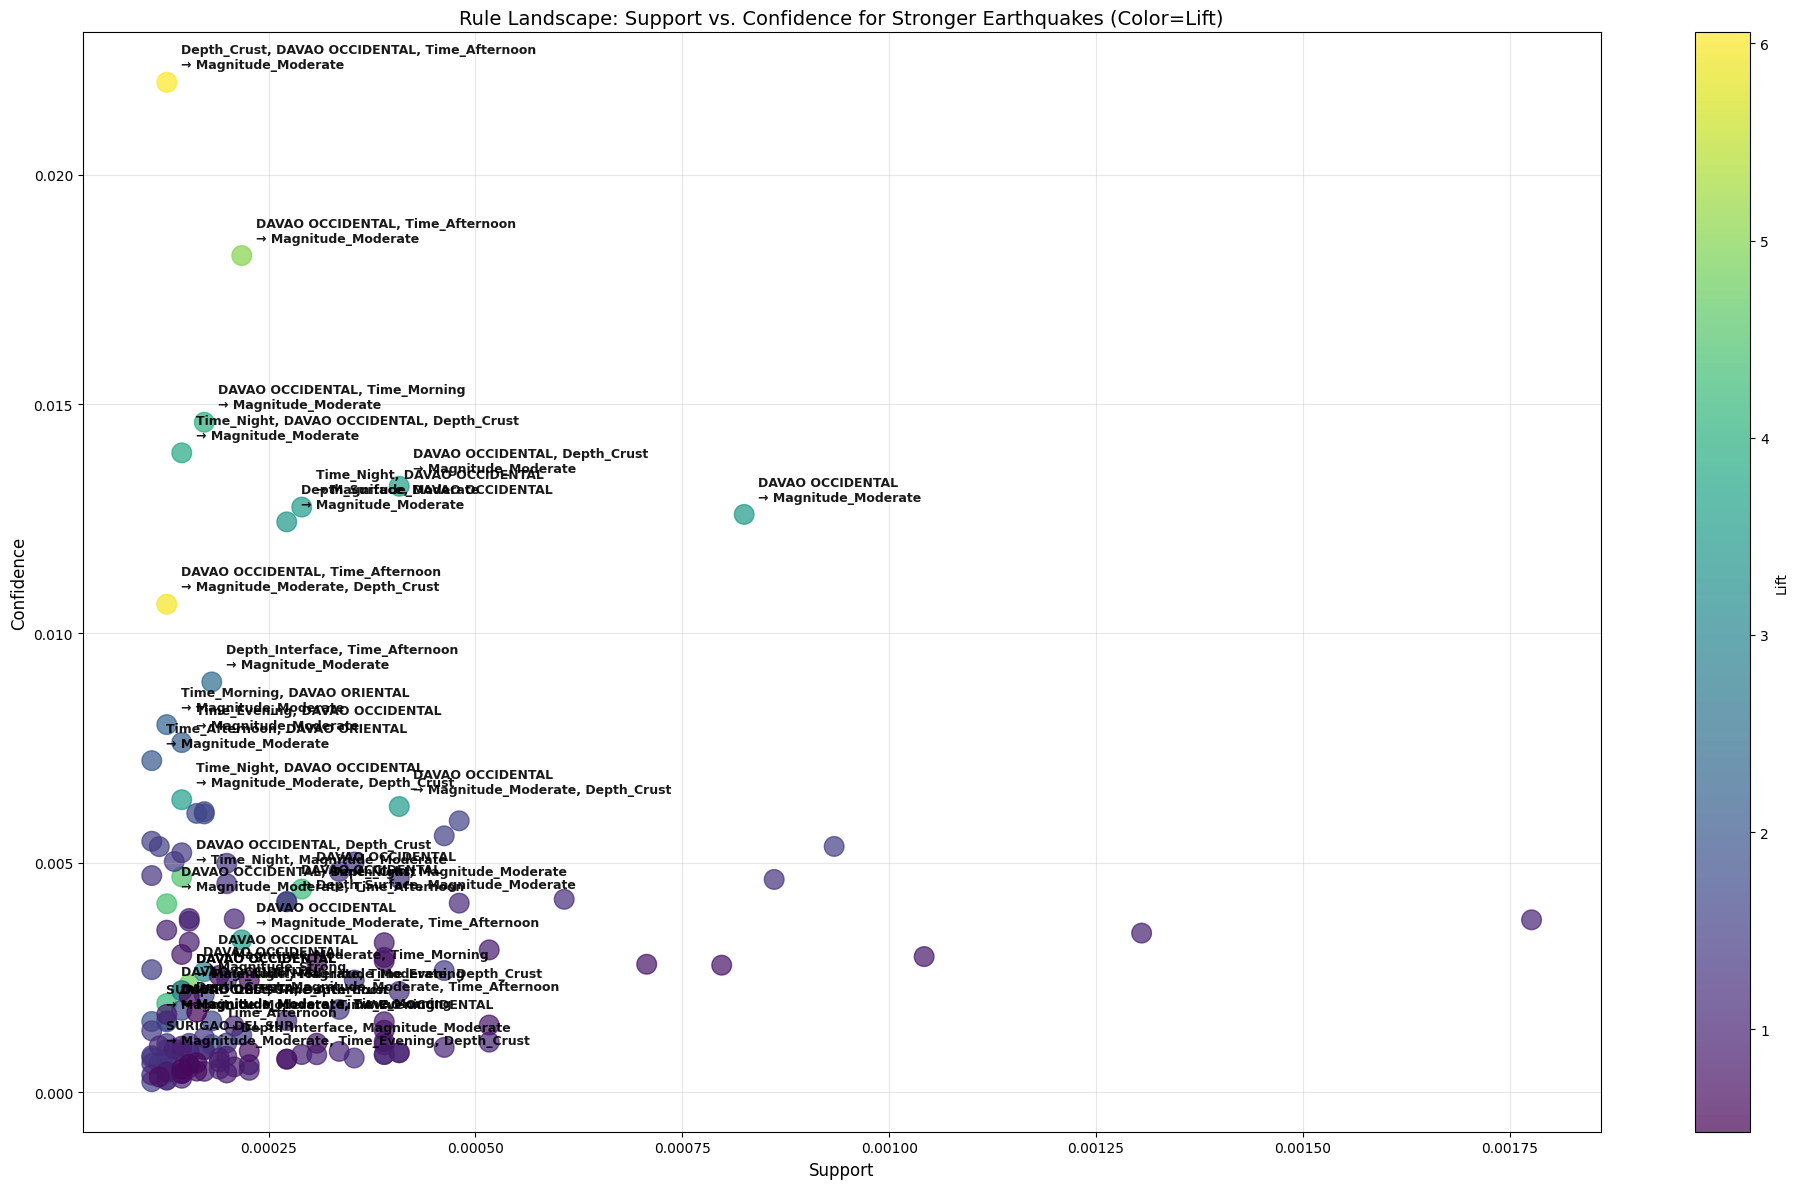

In [ ]:
# Set the figure size (width=20 inches, height=12 inches)
big_earthquake_rules = pd.read_csv("../dataset/big_earthquake_rules.csv")

print(f"Loading {len(big_earthquake_rules)} rules...")

fig, ax = plt.subplots(figsize=(20, 12))

scatter = ax.scatter(
    x=big_earthquake_rules["support"],
    y=big_earthquake_rules["confidence"],
    c=big_earthquake_rules["lift"],
    cmap="viridis",
    s=200,  
    alpha=0.7
)

# Get top 30 rules by lift for labeling
top_30_rules = big_earthquake_rules.nlargest(30, 'lift')

print("Adding annotations...")
for idx, row in top_30_rules.iterrows():
    # Convert antecedents/consequents if they're frozensets
    ante = str(row['antecedents']).replace('frozenset({', '').replace('})', '').replace("'", "")
    cons = str(row['consequents']).replace('frozenset({', '').replace('})', '').replace("'", "")
    
    ax.annotate(
        f"{ante} \n→ {cons}", 
        xy=(row['support'], row['confidence']),
        xytext=(10, 10),
        textcoords='offset points',
        fontsize=9,
        color='black',
        fontweight='bold',
        alpha=0.9
    )

ax.set_xlabel('Support', fontsize=12)
ax.set_ylabel('Confidence', fontsize=12)
ax.set_title("Rule Landscape: Support vs. Confidence for Stronger Earthquakes (Color=Lift)", fontsize=14)
ax.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Lift')

plt.tight_layout()
print("Displaying plot...")
plt.show()

In [ ]:

df_big = pd.read_csv("../dataset/big_earthquake_rules.csv")

# Define Keywords to Ignore (only count Locations)
ignore_words = [
    'Depth_Crust', 'Depth_Interface', 'Depth_Deep', 'Depth_Surface',
    'Magnitude_Moderate', 'Magnitude_Strong', 'Magnitude_Major', 
    'Time_Morning', 'Time_Afternoon', 'Time_Evening', 'Time_Night', 
    'LOC_OTHER'
]

# 3. Count Province Occurrences in Antecedents
location_counts = {}

for antecedents in df_big['antecedents']:
    # Split the string "Depth_Crust, DAVAO OCCIDENTAL" into list items
    items = antecedents.split(', ')
    
    for item in items:
        # if location, count it
        if item not in ignore_words:
            location_counts[item] = location_counts.get(item, 0) + 1

# Convert to Series for easy sorting
loc_series = pd.Series(location_counts).sort_values(ascending=False)


print("--- THE BIG THREE HIGH-RISK PROVINCES ---")
top_3 = loc_series.head(3)
for loc, count in top_3.items():
    print(f"{loc}: {count} Rules")
    
    # Specific check for Davao Occidental & Strong Magnitude
    if loc == 'DAVAO OCCIDENTAL':
        strong_check = df_big[
            (df_big['antecedents'].str.contains('DAVAO OCCIDENTAL')) & 
            (df_big['consequents'].str.contains('Magnitude_Strong'))
        ]
        if not strong_check.empty:
            print(f"   -> Confirmation: Found {len(strong_check)} rule(s) linking {loc} directly to Magnitude_Strong.")

    # Specific check for Surigao del Sur & Surface Depth
    if loc == 'SURIGAO DEL SUR':
        surface_check = df_big[
            (df_big['antecedents'].str.contains('SURIGAO DEL SUR')) & 
            (df_big['antecedents'].str.contains('Depth_Surface'))
        ]
        print(f"   -> Confirmation: Found {len(surface_check)} rules linking {loc} with Depth_Surface.")

# --- GENERATE "THE OUTLIERS" ANALYSIS ---
print("\n--- NEW FINDINGS (THE 'OUTLIERS') ---")
# Filter for locations that appear exactly once
outliers = loc_series[loc_series == 1]
outlier_names = outliers.index.tolist()

print(f"Locations with single rules: {', '.join(sorted(outlier_names))}")
print("Insight: These represent 'latent risk' or isolated anomalies rather than active trends.")

--- THE BIG THREE HIGH-RISK PROVINCES ---
DAVAO OCCIDENTAL: 22 Rules
   -> Confirmation: Found 1 rule(s) linking DAVAO OCCIDENTAL directly to Magnitude_Strong.
SURIGAO DEL SUR: 17 Rules
   -> Confirmation: Found 1 rules linking SURIGAO DEL SUR with Depth_Surface.
DAVAO ORIENTAL: 11 Rules

--- NEW FINDINGS (THE 'OUTLIERS') ---
Locations with single rules: CAGAYAN, EASTERN SAMAR, OCCIDENTAL MINDORO, SURIGAO DEL NORTE
Insight: These represent 'latent risk' or isolated anomalies rather than active trends.


## Observation from First Apriori Rule Mining Implementation
### In this section we are going to discuss the implications of some of the generated rules of the Apriori algorithm to the Philippine Earthquake Dataset.

* Rule: {Depth_Crust, DAVAO OCCIDENTAL, Time_Afternoon} -> {Magnitude_Moderate} and Lift: 6.06

* Analysis: This is an exceptionally high Lift for this association rule. It means that if a Crustal earthquake happens in Davao Occidental during the afternoon, it is 6 times more likely to be a Moderate (Magnitude 5 or higher) earthquake than a random event would be.

* Insight: This reinforces the "high energy" idea of Davao Occidental. Unlike Cebu (which is 98% Micro), Davao Occidental has a statistically significant tendency to release larger amounts of energy, particularly in crustal depths. This also means that the province or the provinces around Davao Occidental will experience not only micro/minor Magnitude earthquakes, but also stronger ones.


------------------------------------------------------------------------------------------------------------
* We found a specific rule for Magnitude_Strong (Mag 6.0–6.9), which is a rare and dangerous event. The rule is as folows: Rule: {DAVAO OCCIDENTAL} -> {Magnitude_Strong} with a Lift of 4.81.

* Analysis: Davao Occidental is nearly 5 times more likely to host a Strong earthquake than the national average. The leverage is low (because Strong quakes are rare), but the Lift confirms the specific danger of this region.


------------------------------------------------------------------------------------------------------------

* Depth_Crust (34 Rules): This is by far the leading depth associated with big earthquakes rules.

* Depth_Surface (18 Rules): Very shallow earthquakes are the second most common predictor.

* Depth_Interface (5 Rules): Deep subduction events appear, but less frequently as a rule.

* Analysis: Contrary to the expectation that big earthquakes always come from deep subduction zones, the Apriori algoritm produced a strong bias towards Crustal sources for significant events.

* Insight: While subduction zones (Interface) produce massive quakes, they are rarer. The data suggests that Crustal faults (0-40km depth) are the primary driver of frequent Moderate-to-Strong seismic activity in the Philippines. This implies the hazard is closer to the surface (and thus potentially more damaging to infrastructure).


------------------------------------------------------------------------------------------------------------


The algorithm filtered out almost all provinces except for three key players that consistently predict higher magnitudes:

* Davao Occidental (22 Rules): It appears in the highest Lift rules and is the only province with a direct rule pointing to Magnitude_Strong (Mag 6+).

* Surigao del Sur (17 Rules): It is heavily associated with Moderate earthquakes, often linked with Depth_Surface, confirming the shallow-swarm nature of its seismicity.

* Davao Oriental (11 Rules): Consistently appears as a secondary hotspot for significant energy release.

* We also have produced outliers. The analysis picked up single rules for Cagayan, Eastern Samar, Occidental Mindoro, and Surigao del Norte.

* Insight: These are likely specific, isolated events (anomalies) rather than a consistent pattern like Davao/Surigao/Cebu. They represent "inactive risks" rather than "active trends."

## 